# **Table of Contents**

1. [Problem Statement](#section1)<br><br>
2. [Data Loading and Description](#section2)<br><br>
3. [Exploratory Data Analysis](#section3)<br><br>
4. [Random Forest Regression](#section4)<br><br>
    4.1.[Preparing X and y using pandas](#section401)<br><br> 
    4.2.[Splitting X and y into training and test datasets ](#section402)<br><br> 
    4.3.[Random Forest regression in scikit-learn](#section403)<br><br> 
    4.4.[Using the Model for Prediction](#section404)<br><br> 
5. [Model evaluation](#section5)<br><br>
    5.1.[Model evaluation using Mean Absolute Error (MAE)](#section501)<br><br> 
    5.2.[Model Evaluation using Mean Squared Error (MSE) ](#section502)<br><br> 
    5.3.[Model Evaluation using Root Mean Squared Error (RMSE)](#section503)<br><br> 
    5.4.[Model Evaluation using Mean Average Percentage Error (MAPE) subtracted from 100%](#section504)<br><br> 
6. [Feature Importances](#section6)<br><br>
7. [Visualizing the Actual & Predicted Values](#section7)<br><br>



<a id = section1></a>
### 1. Problem Statement
The SalePrice (in dollars) for a particular House as a function of eighty one explanatory variables(EV) explaining all the  aspects of the House.

The main objective is to find a function which can  predicts the SalePrice of a House using the 81 explanatory variables.

Identification of the features which contribute to the SalePrice.

The relationship between the various features and their response is represented using various visualization methods.



<a id=section2></a>
### 2. Data Loading and Description

The dataset comprises of 1460 observations of 81 columns. Below is a table showing names of all the columns and their description.

| Column Name  |  Description    
|--------------|--------------|
| Id           |  House Id    |   
|MSSubClass    |The building class   |
|MSZoning      |	The general zoning classification|
|LotFrontage|Linear feet of street connected to property|
|LotArea	|Lot size in square feet|
|Street|	Type of road access|
|Alley	|Type of alley access|
|LotShape	|General shape of property|
|LandContour|	Flatness of the property|
|Utilities	|Type of utilities available|
|LotConfig	|Lot configuration|
|LandSlope	|Slope of property|
|Neighborhood|	Physical locations within Ames city limits|
|Condition1	|Proximity to main road or railroad|
|Condition2	|Proximity to main road or railroad (if a second is present)|
|BldgType	|Type of dwelling|
|HouseStyle	|Style of dwelling|
|OverallQual|	Overall material and finish quality|
|OverallCond|	Overall condition rating|
|YearBuilt	|Original construction date|
|YearRemodAdd|	Remodel date|
|RoofStyle	|Type of roof|
|RoofMatl	|Roof material|
|Exterior1st|	Exterior covering on house|
|Exterior2nd|	Exterior covering on house (if more than one material)|
|MasVnrType	|Masonry veneer type|
|MasVnrArea	|Masonry veneer area in square feet|
|ExterQual	|Exterior material quality|
|ExterCond	|Present condition of the material on the exterior|
|Foundation	|Type of foundation|
|BsmtQual	|Height of the basement|
|BsmtCond	|General condition of the basement|
|BsmtExposure|	Walkout or garden level basement walls|
|BsmtFinType1|	Quality of basement finished area|
|BsmtFinSF1	|Type 1 finished square feet|
|BsmtFinType2|	Quality of second finished area (if present)|
|BsmtFinSF2Type 2 |finished square feet|
|BsmtUnfSF|	Unfinished square feet of basement area|
|TotalBsmtSF|	Total square feet of basement area|
|Heating	|Type of heating|
|HeatingQC|	Heating quality and condition|
|CentralAir|	Central air conditioning|
|Electrical|	Electrical system|
|1stFlrSF|	First Floor square feet|
|2ndFlrSF|	Second floor square feet|
|LowQualFinSF|	Low quality finished square feet (all floors)|
|GrLivArea	|Above grade (ground) living area square feet|
|BsmtFullBath|	Basement full bathrooms|
|BsmtHalfBath|	Basement half bathrooms|
|FullBath|	Full bathrooms above grade|
|HalfBath|	Half baths above grade|
|Bedroom	|Number of bedrooms above basement level|
|Kitchen	|Number of kitchens|
|KitchenQual|	Kitchen quality|
|TotRmsAbvGrd|	Total rooms above grade (does not include bathrooms)|
|Functional	|Home functionality rating|
|Fireplaces	|Number of fireplaces|
|FireplaceQu|	Fireplace quality|
|GarageType	|Garage location|
|GarageYrBlt|	Year garage was built|
|GarageFinish|	Interior finish of the garage|
|GarageCars	|Size of garage in car capacity|
|GarageArea	|Size of garage in square feet|
|GarageQual	|Garage quality|
|GarageCond	|Garage condition|
|PavedDrive	|Paved driveway|
|WoodDeckSF	|Wood deck area in square feet|
|OpenPorchSF|	Open porch area in square feet|
|EnclosedPorch|	Enclosed porch area in square feet|
|3SsnPorch	|Three season porch area in square feet|
|ScreenPorch	|Screen porch area in square feet|
|PoolArea	|Pool area in square feet|
|PoolQC	|Pool quality|
|Fence	|Fence quality|
|MiscFeature|	Miscellaneous feature not covered in other categories|
|MiscVal|	$Value of miscellaneous feature|
|MoSold	|Month Sold|
|YrSold|	Year Sold|
|SaleType|	Type of sale|
|SaleCondition|	Condition of sale|
|SalePrice	|Property's Sale Price in dollars (This is the target variable that we are trying to predict)|

### Importing Packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

from sklearn import metrics
from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline


### Importing the Dataset

In [3]:
# reading the dataset
house = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')

In [4]:
pd.set_option('display.max_columns',81)
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#  Features

There are 81 features. For example, Id, MSSubclass, MSZoning, LotArea, etc.


SalePrice: Property's Sale Price in dollars (This is the target variable that I am trying to predict)


<a id=section3></a>
## 3. Exploratory Data Analysis(EDA)

In [7]:
#Checking dataset shape
house.shape

(1460, 81)

The dataset contains ***1460 rows and 81 coulumns.***

In [8]:
#Checking dataset information
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The dataset contains **38 numerical and 43 categorical** features.

In [5]:
#Checking dataset description
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [21]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = house.profile_report(title='house profiling before data processing')
profile.to_file(output_file='housesdata_before_preprocessing.html')

# To output the pandas profiling report on the notebook.

house.profile_report(title='House Pandas Profiling before Data Preprocessing', style={'full_width':True})

In [6]:
profile = pandas_profiling.ProfileReport(house)
profile.to_file(outputfile="housesdata_before_preprocessing.html")

TypeError: to_file() got an unexpected keyword argument 'outputfile'

Here, I have pdeerformed Pandas Profiling before preprocessing the dataset, so I named the html file as housesdata_before_preprocessing.html. Now I will process the data to better understand it.


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

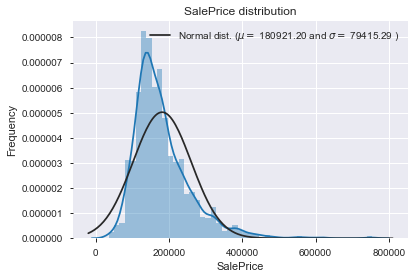

In [11]:
# Plot Histogram
sns.distplot(house['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

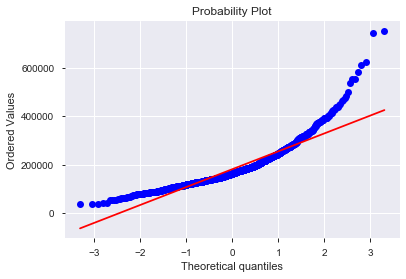

Skewness: 1.882876
Kurtosis: 6.536282


In [12]:
fig = plt.figure()
res = stats.probplot(house['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())


Looking at the kurtosis score, I can see that there is a very nice peak. However, looking at the skewness score, it is visible that the sale prices deviate from the normal distribution.

Text(0.5, 1, 'Correlation Matrix to Find out which Feature is most Related to SalePrice')

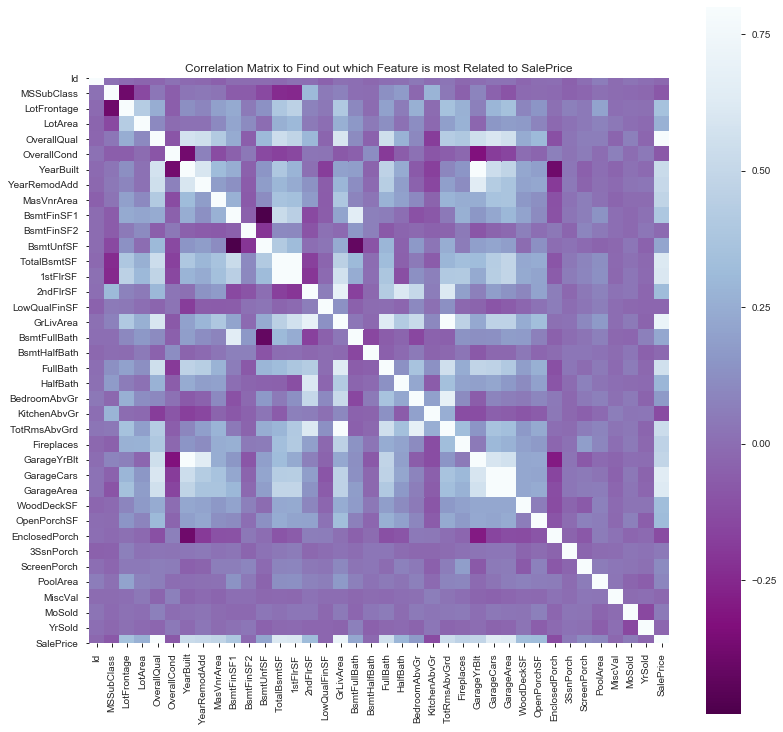

In [14]:
# Correlation Matrix Heatmap
corrmat = house.corr()
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap='BuPu_r', linecolor ='black');
plt.title('Correlation Matrix to Find out which Feature is most Related to SalePrice')

It is difficult to comprehend from the above Correlation Matrix that which features are most correlated with SalePrice. So, let's see the top 10 features most related to Sale Price so that I can draw some sensible inference from these features.

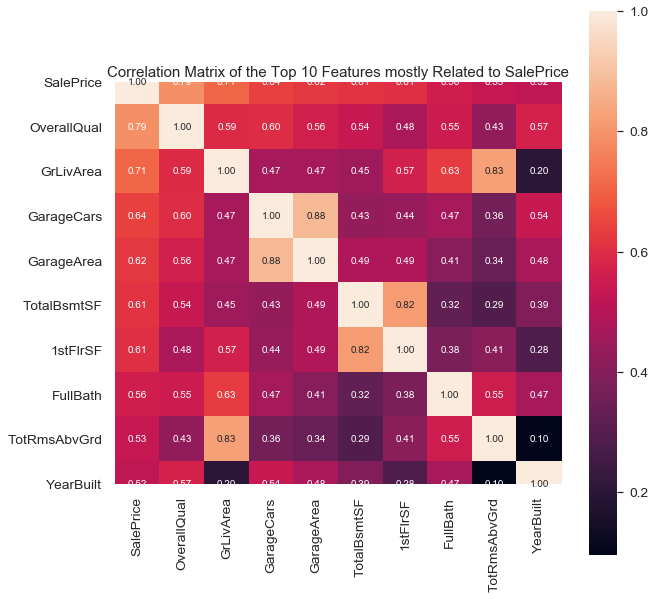

In [16]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
f1, ax1 = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Matrix of the Top 10 Features mostly Related to SalePrice')
plt.show()


In [12]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0                SalePrice
1              OverallQual
2                GrLivArea
3               GarageCars
4               GarageArea
5              TotalBsmtSF
6                 1stFlrSF
7                 FullBath
8             TotRmsAbvGrd
9                YearBuilt

The above list shows the top 10 most correlated features to SalePrice. Let's take a look at how each relates to SalePrice.

***OverallQual vs SalePrice***

Text(0.5, 1.0, 'OverallQual v/s SalePrice')

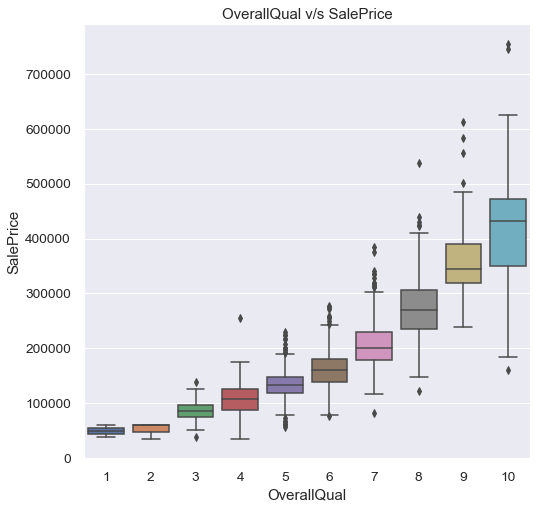

In [19]:
# OverallQual vs SalePrice
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x=house['OverallQual'], y=house['SalePrice'])
plt.title('OverallQual v/s SalePrice')

- SalePrice increses with OverallQual. The distribution looks good.

**GrLivArea vs SalePrice**

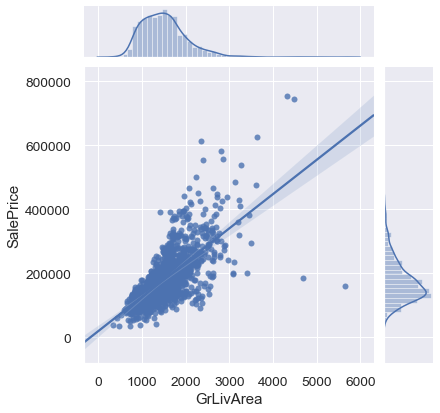

In [14]:
# GrLivArea vs SalePrice
sns.jointplot(x=house['GrLivArea'], y=house['SalePrice'], kind='reg')

- SalePrice increases with GrLivArea.
- There are 2 outliers to this as we can see in the bottom-right of the plot. So, we have to remove these outliers for better data analysis.

In [15]:
# Removing outliers manually (Two points in the bottom right)
house = house.drop(house[(house['GrLivArea']>4000) 
                         & (house['SalePrice']<300000)].index).reset_index(drop=True)

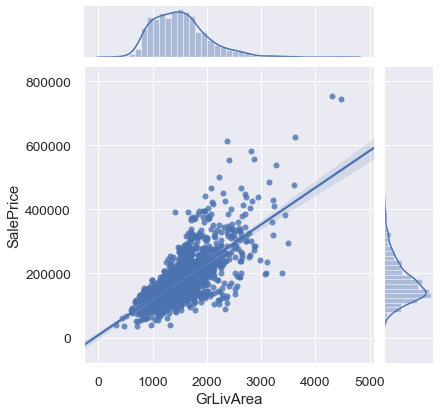

In [16]:
# GrLivArea vs SalePrice
sns.jointplot(x=house['GrLivArea'], y=house['SalePrice'], kind='reg')

- The 2 outliers have been removed.

**GarageCars vs SalePrice**

Text(0.5, 1.0, 'GarageCars vs SalePrice')

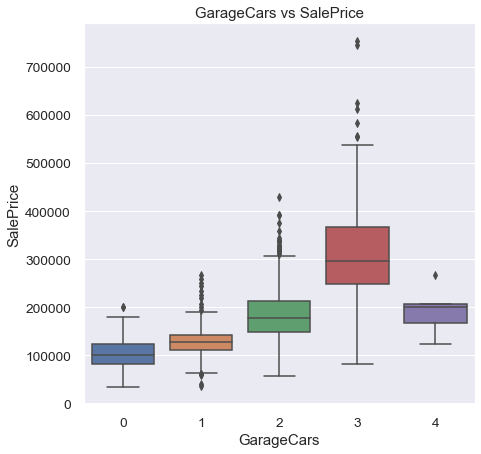

In [17]:
# GarageCars vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=house['GarageCars'], y=house['SalePrice'])
plt.title('GarageCars vs SalePrice')

- SalePrice increases with GarageCars.
- There is 1 outlier to this as we can see in the right-side of the plot that 4-car garages result in less SalePrice. So, we will have to take care of this outlier.

In [18]:
# Removing outliers manually (More than 4-cars, less than $300k)
house = house.drop(house[(house['GarageCars']>3) 
                         & (house['SalePrice']<300000)].index).reset_index(drop=True)

Text(0.5, 1.0, 'GarageCars vs SalePrice')

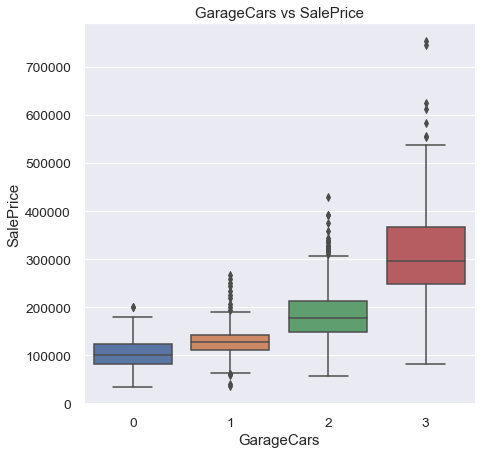

In [19]:
# GarageCars vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=house['GarageCars'], y=house['SalePrice'])
plt.title('GarageCars vs SalePrice')

**The outlier has been removed.**

**GarageArea vs SalePrice**

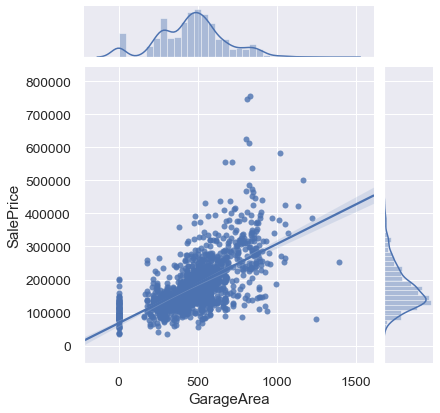

In [20]:
# GarageArea vs SalePrice
sns.jointplot(x=house['GarageArea'], y=house['SalePrice'], kind='reg')

- SalePrice increases with GarageArea.
- There are 2 outliers to this as we can see in the bottom-right of the plot. Again, we will have to remove these 2 outliers.

In [21]:
# Removing outliers manually (More than 1200 sqft, less than $300k)
house = house.drop(house[(house['GarageArea']>1200) 
                         & (house['SalePrice']<300000)].index).reset_index(drop=True)

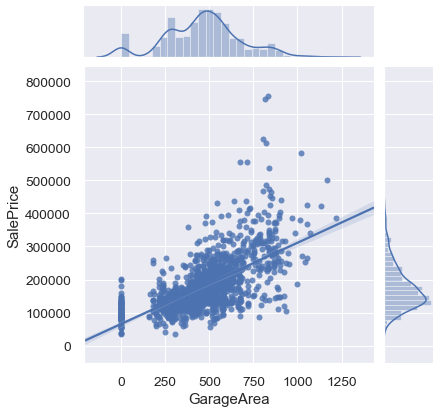

In [22]:
# GarageArea vs SalePrice
sns.jointplot(x=house['GarageArea'], y=house['SalePrice'], kind='reg')

- The outliers have been removed.

**TotalBsmtSF vs SalePrice**

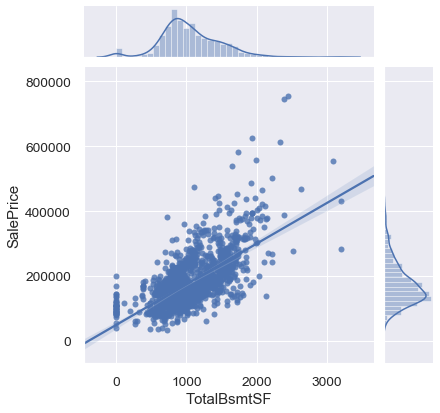

In [23]:
# TotalBsmtSF vs SalePrice
sns.jointplot(x=house['TotalBsmtSF'], y=house['SalePrice'], kind='reg')

- SalePrice increases with TotalBsmtSF.
- There is 1 outlier to this as we can see in the bottom-right of the plot.

In [24]:
# Removing outliers manually (More than 3000 sqft, less than $400k)
house = house.drop(house[(house['TotalBsmtSF']>3000) 
                         & (house['SalePrice']<400000)].index).reset_index(drop=True)

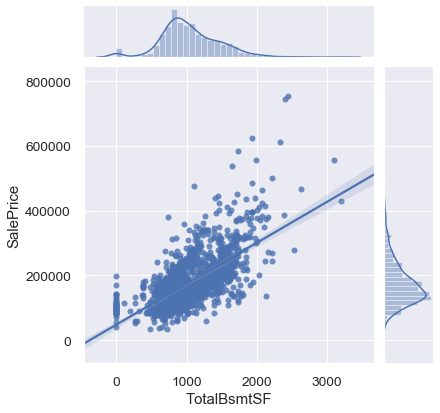

In [25]:
# TotalBsmtSF vs SalePrice
sns.jointplot(x=house['TotalBsmtSF'], y=house['SalePrice'], kind='reg')

- The outlier has been removed.

**1stFlrSF vs SalePrice**

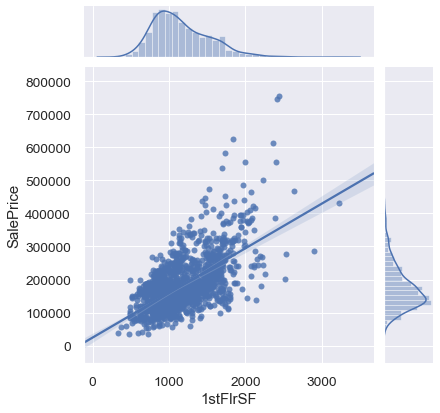

In [26]:
# 1stFlrSF vs SalePrice
sns.jointplot(x=house['1stFlrSF'], y=house['SalePrice'], kind='reg')

- SalePrice increases with 1stFlrSF. The distribution looks good.

**FullBath vs SalePrice**

Text(0.5, 1.0, 'FullBath vs SalePrice')

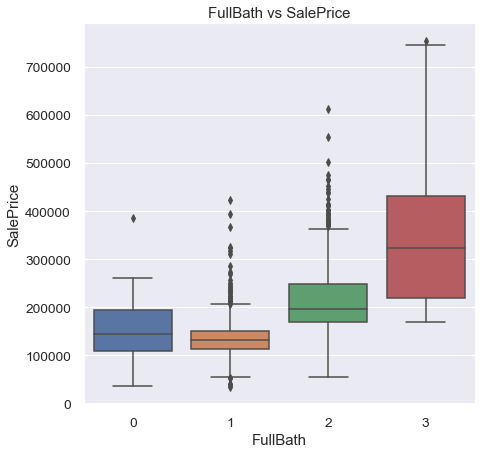

In [27]:
# FullBath vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=house['FullBath'], y=house['SalePrice'])
plt.title('FullBath vs SalePrice')

SalePrice increases with number of FullBath. The distribution looks good.

**TotRmsAbvGrd vs SalePrice**

Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

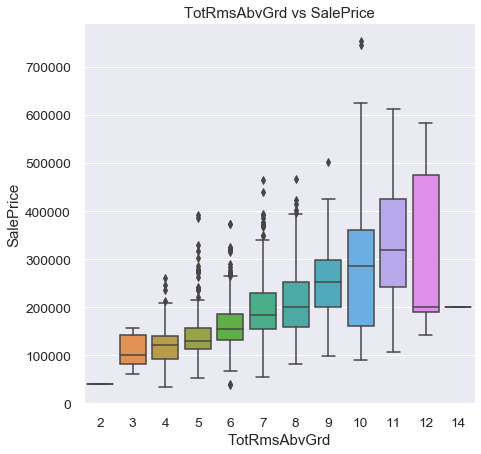

In [28]:
# TotRmsAbvGrd vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=house['TotRmsAbvGrd'], y=house['SalePrice'])
plt.title('TotRmsAbvGrd vs SalePrice')

- SalePrice overall increses with TotRmsAbvGrd.
- There is 1 outlier to this as we can see that 14 Rooms house has a SalePrice less than even 7 Rooms house. So, we will have to take care of this outlier.

In [29]:
# Removing outliers manually (More than 12-Rooms, less than $300k)
house = house.drop(house[(house['TotRmsAbvGrd']>12) 
                         & (house['SalePrice']<300000)].index).reset_index(drop=True)

Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

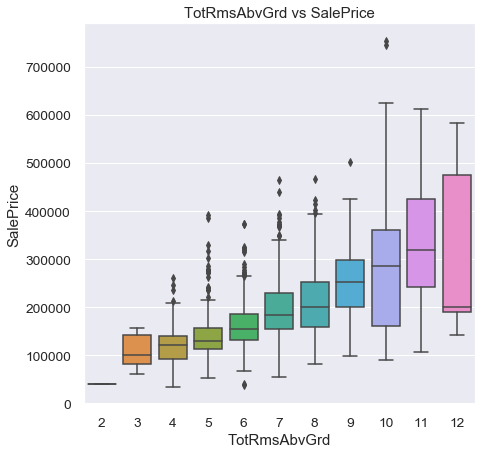

In [30]:
# TotRmsAbvGrd vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=house['TotRmsAbvGrd'], y=house['SalePrice'])
plt.title('TotRmsAbvGrd vs SalePrice')

- The outlier has been removed.

Text(0.5, 1.0, 'YearBuilt vs SalePrice')

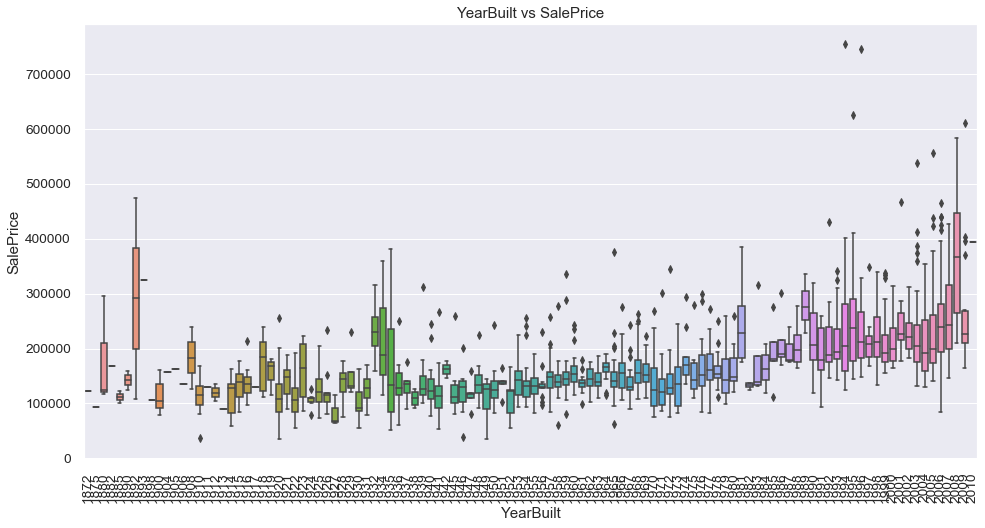

In [31]:
# YearBuilt vs SalePrice
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x=house['YearBuilt'], y=house['SalePrice'])
plt.xticks(rotation=90);
plt.title('YearBuilt vs SalePrice')

- SalePrice in general is more for new houses than old houses.

## Dealing with Missing Values

In [32]:
#Checking which columns have missing values
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      258
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

- Whichever feature column has more than 50% missing values, that is, more than 730 missing values, we are going to drop that feature column.

- Whichever feature column has less than 50% missing values, that is, less than 730 missing values, we are going to keep that feature column.

    - If the feature column is a numerical column, then we are going to replace the missing values with the median values.
    - If the feature column is a categorical column, then we are going to replace the missing values with the mode value.

In [33]:
#From the house_data_before_preprocessing.html file we can see that 'Alley','FireplaceQu','Fence','MiscFeature','PoolQC' have more than 50% missing values, so dropping them
house.drop(['Alley','FireplaceQu','Fence','MiscFeature','PoolQC'], axis=1, inplace=True)

In [34]:
# replace NaN values! If categorical feature column then using mode, otherwise median
for col in house:
    if house[col].dtype == 'object':
        house[col] = house[col].fillna(house[col].mode()[0])
    else:
        house[col] = house[col].fillna(house[col].median())

In [35]:
#Checking for missing values again
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

- We can see that all the missing values have been taken care of.

### Feature Engineering

The Year & Month related features have been interpreted as numerical when they are actually categorical. Thus, we need to transform these features from numerical to categorical.

In [36]:
#Year and Month Features are transformed into categorical features.
house['YearBuilt'] = house['YearBuilt'].astype(str)
house['YearRemodAdd'] = house['YearRemodAdd'].astype(str)
house['GarageYrBlt'] = house['GarageYrBlt'].astype(str)
house['YrSold'] = house['YrSold'].astype(str)
house['MoSold'] = house['MoSold'].astype(str)

There are some categorical features that actually has a particular order just like in feedback forms (Ex, VGood, Good, Fair, Poor). Few examples of such ordinal categorical features in the dataset are: **BsmtQual, KitchenQual, GarageQual** etc.

In [38]:
# Finding out the number of unique values contained in these ordinal categorical columns
print("BsmtQual Unique Values: {}".format(house['BsmtQual'].unique()))
print("BsmtCond Unique Values: {}".format(house['BsmtCond'].unique()))
print("ExterQual Unique Values: {}".format(house['ExterQual'].unique()))
print("ExterCond Unique Values: {}".format(house['ExterCond'].unique()))
print("GarageQual Unique Values: {}".format(house['GarageQual'].unique()))
print("GarageCond Unique Values: {}".format(house['GarageCond'].unique()))
print("HeatingQC Unique Values: {}".format(house['HeatingQC'].unique()))
print("KitchenQual Unique Values: {}".format(house['KitchenQual'].unique()))

BsmtQual Unique Values: ['Gd' 'TA' 'Ex' 'Fa']
BsmtCond Unique Values: ['TA' 'Gd' 'Fa' 'Po']
ExterQual Unique Values: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond Unique Values: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
GarageQual Unique Values: ['TA' 'Fa' 'Gd' 'Ex' 'Po']
GarageCond Unique Values: ['TA' 'Fa' 'Gd' 'Po' 'Ex']
HeatingQC Unique Values: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual Unique Values: ['Gd' 'TA' 'Ex' 'Fa']


- Now, we will transform the ordinal categorical features to numerical features as per the following scheme:

| Rating | Value | 
| --- | --- | 
| Ex | 4 | 
| Gd | 3 |
| TA | 2 |
| Fa | 1 |
| Po | 0 |


In [39]:
# Transforming the ordinal categorical features to numerical features
house.BsmtQual.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
house.BsmtCond.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
house.ExterQual.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
house.ExterCond.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
house.GarageQual.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
house.GarageCond.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
house.HeatingQC.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
house.KitchenQual.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)

In [40]:
# Making sure that the data type of these ordinal categorical features is of integer type
house['BsmtQual'] = house['BsmtQual'].astype(np.int64)
house['BsmtCond'] = house['BsmtCond'].astype(np.int64)
house['ExterQual'] = house['ExterQual'].astype(np.int64)
house['ExterCond'] = house['ExterCond'].astype(np.int64)
house['GarageQual'] = house['GarageQual'].astype(np.int64)
house['GarageCond'] = house['GarageCond'].astype(np.int64)
house['HeatingQC'] = house['HeatingQC'].astype(np.int64)
house['KitchenQual'] = house['KitchenQual'].astype(np.int64)

In [41]:
# Finding out the list of categorical features in the dataset after all the transformations
house.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
# Finding out the list of numerical features in the dataset after all the transformations
house.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [43]:
#Creating encoding feature columns corresponding to categorical feature columns
house = pd.get_dummies(house, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], drop_first=True)

In [44]:
# Making House Ids as the index of the data frame
house.set_index('Id', inplace=True)

In [ ]:
profile = pandas_profiling.ProfileReport(house)
profile.to_file(outputfile="house_data_after_preprocessing.html")

Now, we have preprocessed the data. Now, the dataset does not contain missing values. We have also introduced new features by encoding categorical feature columns. We have transformed some feature columns as well. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e house_data_after_preprocessing.html and house_data_before_preprocessing.html.
In house_data_after_preprocessing.html report, observations:

In the Dataset info, Total Missing(%) = 0.0%
Number of feature columns = 490
Observe the newly created encoded feature columns BldgType_2fmCon, BldgType_Duplex, SaleCondition_Normal, etc. Click on Toggle details to get more detailed information about it.


<a id=section4></a>
### 4. Random Forest Regression


<a id=section401></a>
### 4.1 Preparing X and y using pandas

In [45]:
# Preparing the predictors dataset
X = house.loc[:,house.columns != 'SalePrice']
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
Id                                                                           
1           60         65.0     8450            7            5       196.0   
2           20         80.0     9600            6            8         0.0   
3           60         68.0    11250            7            5       162.0   
4           70         60.0     9550            7            5         0.0   
5           60         84.0    14260            8            5       350.0   

    ExterQual  ExterCond  BsmtQual  BsmtCond  ...  SaleType_ConLI  \
Id                                            ...                   
1           3          2         3         2  ...               0   
2           2          2         3         2  ...               0   
3           3          2         3         2  ...               0   
4           2          2         2         3  ...               0   
5           3          2         3         2  ...               0   

    SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                            
1                0             0             0            1   
2                0             0             0            1   
3                0             0             0            1   
4                0             0             0            1   
5                0             0             0            1   

    SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                      
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
5                       0                     0                     0   

    SaleCondition_Normal  SaleCondition_Partial  
Id                                               
1                      1                      0  
2                      1                      0  
3                      1                      0  
4                      0                      0  
5                      1                      0  

[5 rows x 488 columns]

In [46]:
# Preparing the response dataset
y = house.SalePrice
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

<a id=section402></a>
### 4.2 Splitting X and y into training and test datasets.

In [47]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)

In [49]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1304, 488)
y_train Shape: (1304,)
X_test Shape: (145, 488)
y_test Shape: (145,)


<a id=section403></a>

### 4.3 Random Forest in scikit-learn

In [50]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Instantiate model with 260 decision trees
model = RandomForestRegressor(n_estimators = 260, random_state = 1)

# Train the model on training data
model.fit(X_train, y_train);

<a id=section404></a>

### 4.4 Using the Model for Prediction

In [54]:
# Use the forest's predict method on the train data
y_pred_train = model.predict(X_train)

# Use the forest's predict method on the test data
y_pred_test = model.predict(X_test)

<a id=section5></a>
### 5. Model Evaluation

<a id=section501></a>
### 5.1 Model Evaluation using Mean Absolute Error (MAE)

In [55]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [56]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 6420.184756960831
MAE for test set is 15517.147931034484


<a id=section502></a>

### 5.2 Model Evaluation using Mean Squared Error (MSE)

In [57]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [58]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 99219038.06729667
MSE for test set is 617984719.656055


<a id=section503></a>

### 5.3 Model Evaluation using Mean Average Percentage Error (MAPE) subtracted from 100 %.

In [59]:
# Calculate the absolute errors
errors_train = abs(y_pred_train - y_train)
errors_test = abs(y_pred_test - y_test)

# Calculate mean absolute percentage error (MAPE)
mape_train = 100 * (errors_train / y_train)
mape_test = 100 * (errors_test / y_test)

# Calculate and display accuracy
accuracy_train = 100 - np.mean(mape_train)
print('Accuracy for Training Data:', round(accuracy_train, 2), '%.')
accuracy_test = 100 - np.mean(mape_test)
print('Accuracy for Testing Data:', round(accuracy_test, 2), '%.')

Accuracy for Training Data: 96.23 %.
Accuracy for Testing Data: 90.68 %.


The model has learned how to predict the SalePrice of a House with 90.68% accuracy.

<a id=section6></a>

<a id=section6></a>
### 6. Feature Importances


In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the features.

In [65]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OverallQual          Importance: 0.59
Variable: GrLivArea            Importance: 0.11
Variable: TotalBsmtSF          Importance: 0.06
Variable: BsmtFinSF1           Importance: 0.03
Variable: 1stFlrSF             Importance: 0.02
Variable: GarageCars           Importance: 0.02
Variable: GarageArea           Importance: 0.02
Variable: LotArea              Importance: 0.01
Variable: ExterQual            Importance: 0.01
Variable: BsmtQual             Importance: 0.01
Variable: BsmtUnfSF            Importance: 0.01
Variable: 2ndFlrSF             Importance: 0.01
Variable: KitchenQual          Importance: 0.01
Variable: TotRmsAbvGrd         Importance: 0.01
Variable: WoodDeckSF           Importance: 0.01
Variable: MSSubClass           Importance: 0.0
Variable: LotFrontage          Importance: 0.0
Variable: OverallCond          Importance: 0.0
Variable: MasVnrArea           Importance: 0.0
Variable: ExterCond            Importance: 0.0
Variable: BsmtCond             Importance: 0.

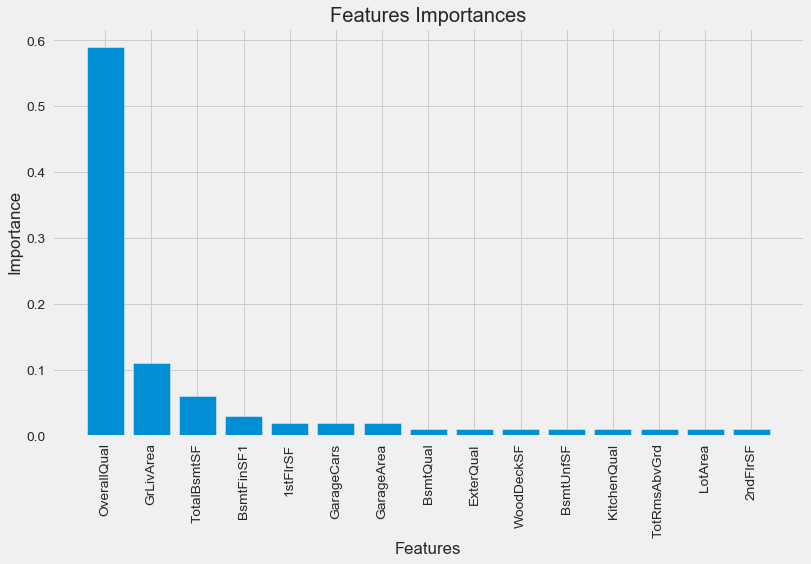

In [66]:
importances1 = [(round(importance,2)) for importance in (importances)]
feature_importances1 = pd.DataFrame(data = {'Importance': list(importances1), 'Features': feature_list})
feature_importances1.sort_values(by=['Importance'], ascending=False, inplace=True)
imp_features = list(feature_importances1[feature_importances1['Importance']>0].Features)
importances2 = list(feature_importances1[feature_importances1['Importance']>0].Importance)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances2)))

# Make a bar chart
f, ax = plt.subplots(figsize=(12, 7))
plt.bar(x_values, importances2, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, imp_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Features Importances');

- From the above observations we can see that:
    - OverallQual (with 59% importance among all the features) is the most important feature in determining the SalePrice of a House.
    - The other features that influence the SalePrice of a House include GrLivArea, TotalBsmtSF, BsmtFinSF1, 1stFlrSF, GarageArea, TotRmsAbvGrd, BsmtUnfSF, BsmtQual, ExterQual, GarageCars, WoodDeckSF, KitchenQual, LotArea & 2ndFlrSF.
    - The above mentioned 15 features together contribute 93% in determining the SalePrice of a House.
    - The rest of the features contribute just 7% in determination of SalePrice of a House.
    
<a id=section7></a>

### 7. Visualizing the Actual & Predicted Values

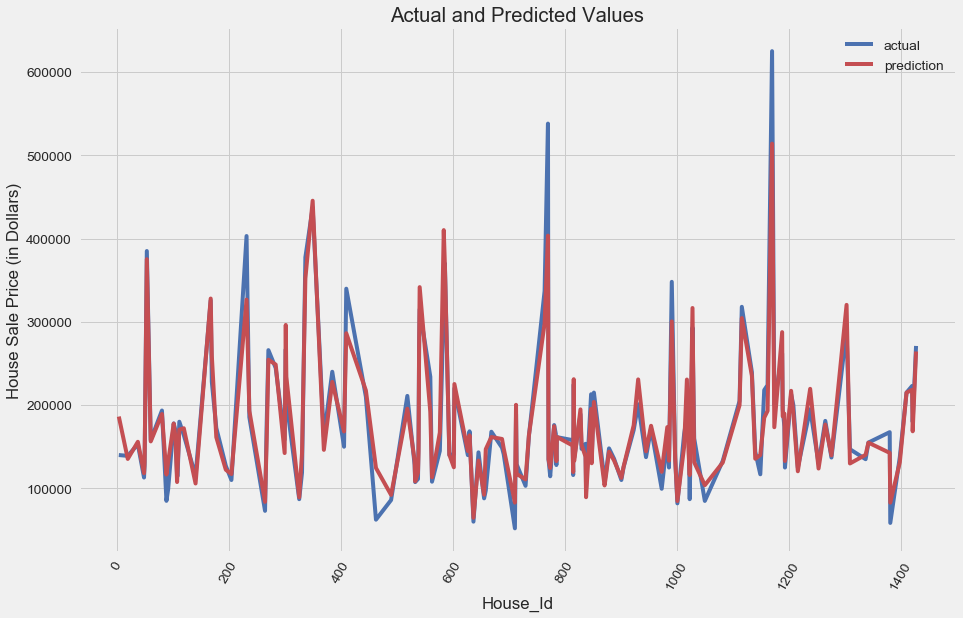

In [68]:
# Dataframe with Test Data IDs and Test Data Actual Sale Price
true_data = pd.DataFrame(data = {'Id': list(y_test.index), 'Actual_SalePrice': list(y_test)})
true_data.sort_values(by=['Id'], inplace=True)

# Dataframe with Test Data IDs and Test Data Predicted Sale Price
predictions_data = pd.DataFrame(data = {'Id': list(y_test.index), 'Predicted_SalePrice': list(y_pred_test)})
predictions_data.sort_values(by=['Id'], inplace=True)

# Plot the actual values
f, ax = plt.subplots(figsize=(14, 9))
plt.plot(true_data['Id'], true_data['Actual_SalePrice'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['Id'], predictions_data['Predicted_SalePrice'], 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('House_Id'); plt.ylabel('House Sale Price (in Dollars)'); plt.title('Actual and Predicted Values');

A nice plot to check how our model has performed. By observing the overlapping between the Actual & Predicted values, we can conclude that our model has performed fairly well.